In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

# Deep Learning with KERAS 

# Understanding recurrent neural networks



## A simple recurrent layer in Keras

Keras allows you to define a recurrent layer: the `SimpleRNN` layer:


In [2]:
from keras.layers import SimpleRNN

`SimpleRNN` processes batches of sequences, like all other Keras layers, not just a single sequence. This means that it takes inputs of shape `(batch_size, timesteps, input_features)`, rather than `(timesteps, 
input_features)`.

Like all recurrent layers in Keras, `SimpleRNN` can be run in two different modes: it can return either the full sequences of successive 
outputs for each timestep (a 3D tensor of shape `(batch_size, timesteps, output_features)`), or it can return only the last output for each 
input sequence (a 2D tensor of shape `(batch_size, output_features)`). These two modes are controlled by the `return_sequences` constructor 
argument. Let's take a look at an example:

In [3]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [4]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


It is sometimes useful to stack several recurrent layers one after the other in order to increase the representational power of a network. 
In such a setup, you have to get all intermediate layers to return full sequences:

In [5]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # This last layer only returns the last outputs.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


Now let's try to use such a model on the IMDB movie review classification problem. The "IMDB dataset" is a set of 50,000 highly-polarized reviews from the Internet Movie Database. They are split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting in 50% negative and 50% positive reviews.

Just like the MNIST dataset, the IMDB dataset comes packaged with Keras. It has already been preprocessed: the reviews (sequences of words) have been turned into sequences of integers, where each integer stands for a specific word in a dictionary.

First, let's preprocess the data:

In [6]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [15]:
input_train.shape

(25000, 500)

In [16]:
y_train.shape

(25000,)

Let's train a simple recurrent network using an `Embedding` layer and a `SimpleRNN` layer:

In [6]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.6582 - acc: 0.5965 - val_loss: 0.5399 - val_acc: 0.7562
Epoch 2/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.4322 - acc: 0.8112 - val_loss: 0.4077 - val_acc: 0.8238
Epoch 3/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.3080 - acc: 0.8776 - val_loss: 0.3921 - val_acc: 0.8240
Epoch 4/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.2212 - acc: 0.9158 - val_loss: 0.3982 - val_acc: 0.8396
Epoch 5/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.1669 - acc: 0.9380 - val_loss: 0.3548 - val_acc: 0.8712
Epoch 6/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.1044 - acc: 0.9634 - val_loss: 0.4638 - val_acc: 0.8270
Epoch 7/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.0694 - acc: 0.9774 - val_loss: 0.4642 - val_acc:

Let's display the training and validation loss and accuracy:

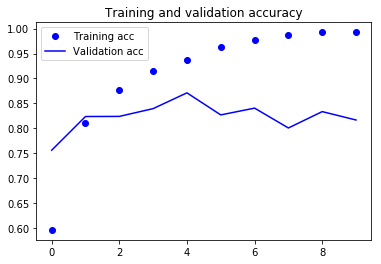

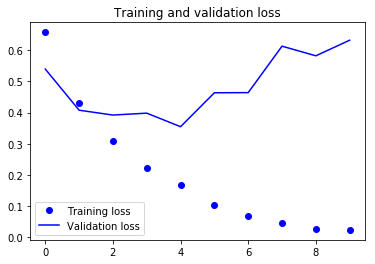

In [8]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Unfortunately, our small recurrent network doesn't perform very well at all(only up to 85% validation accuracy). Part of the problem is that our inputs only consider the first 500 words rather the full sequences. The remainder of the problem is simply that `SimpleRNN` isn't very good at processing long sequences, like text. Other types of recurrent layers perform much better. Let's take a look at some 
more advanced layers.

[...]

## A concrete LSTM example in Keras

Now let's switch to more practical concerns: we will set up a model using a LSTM layer and train it on the IMDB data. Here's the network, 
similar to the one with `SimpleRNN` that we just presented. We only specify the output dimensionality of the LSTM layer, and leave every 
other argument (there are lots) to the Keras defaults. Keras has good defaults, and things will almost always "just work" without you 
having to spend time tuning parameters by hand.

In [9]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 84s 4ms/step - loss: 0.5100 - acc: 0.7624 - val_loss: 0.5157 - val_acc: 0.7336
Epoch 2/10
20000/20000 [==============================] - 84s 4ms/step - loss: 0.2917 - acc: 0.8864 - val_loss: 0.3022 - val_acc: 0.8726
Epoch 3/10
20000/20000 [==============================] - 85s 4ms/step - loss: 0.2280 - acc: 0.9135 - val_loss: 0.3200 - val_acc: 0.8818
Epoch 4/10
20000/20000 [==============================] - 86s 4ms/step - loss: 0.2004 - acc: 0.9258 - val_loss: 0.4326 - val_acc: 0.8350
Epoch 5/10
20000/20000 [==============================] - 89s 4ms/step - loss: 0.1753 - acc: 0.9375 - val_loss: 0.2820 - val_acc: 0.8878
Epoch 6/10
20000/20000 [==============================] - 86s 4ms/step - loss: 0.1566 - acc: 0.9440 - val_loss: 0.3761 - val_acc: 0.8806
Epoch 7/10
20000/20000 [==============================] - 83s 4ms/step - loss: 0.1396 - acc: 0.9506 - val_loss: 0.4877 - val_acc:

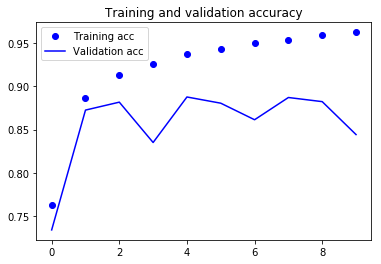

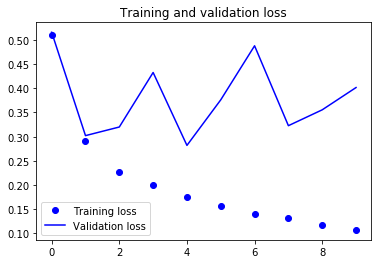

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Clearly, the results are still far from optimal, but the accuracy levels in any case improves when using the LSTM 
when compared to a simple RNN. The results can be further improved by varying the number of LSTM units, or by adding more layers. You can try these changes to see if you can get better results, but also keep in mind the higher computational load that such changes might imply.